In [41]:
from sympy import *

In [42]:
# Sphere

c0,c1,c2 = symbols("c0:3")
R = symbols("R")
x0,x1,x2 = symbols("x0:3")

sphere = sqrt((x0 - c0)**2 + (x1 - c1)**2 + (x2 - c2)**2) - R

grad_sphere = [simplify(diff(sphere, x0)), 
               simplify(diff(sphere,x1)), 
               simplify(diff(sphere,x2))]

for el in grad_sphere:
    print_ccode(el)

(-c0 + x0)/sqrt(pow(c0 - x0, 2) + pow(c1 - x1, 2) + pow(c2 - x2, 2))
(-c1 + x1)/sqrt(pow(c0 - x0, 2) + pow(c1 - x1, 2) + pow(c2 - x2, 2))
(-c2 + x2)/sqrt(pow(c0 - x0, 2) + pow(c1 - x1, 2) + pow(c2 - x2, 2))


In [43]:
# Ellipsoid 

a0,a1,a2 = symbols("a0:3")

ellipsoid = (x0 - c0)**2 / a0**2 + (x1 - c1)**2 / a1**2 + (x2 - c2)**2 / a2**2 - 1

grad_ellipsoid = [simplify(diff(ellipsoid, x0)), 
               simplify(diff(ellipsoid,x1)), 
               simplify(diff(ellipsoid,x2))]

for el in grad_ellipsoid:
    print_ccode(el)

2*(-c0 + x0)/pow(a0, 2)
2*(-c1 + x1)/pow(a1, 2)
2*(-c2 + x2)/pow(a2, 2)


In [90]:
A, omega, r = symbols("A omega r")

O0,O1,O2 = symbols("O0:3")

r = sqrt((x0 - O0)**2 + (x1 - O1)**2)

sinc = x2 - O2 - A*sin(omega*r)/(omega * r)

grad_sinc = [simplify(diff(sinc, xi)) for xi in (x0,x1,x2)]

for cmpt in grad_sinc:
    print_ccode(cmpt)

A*(O0 - x0)*(omega*pow(pow(O0 - x0, 2) + pow(O1 - x1, 2), 3.0/2.0)*cos(omega*sqrt(pow(O0 - x0, 2) + pow(O1 - x1, 2))) - (pow(O0 - x0, 2) + pow(O1 - x1, 2))*sin(omega*sqrt(pow(O0 - x0, 2) + pow(O1 - x1, 2))))/(omega*pow(pow(O0 - x0, 2) + pow(O1 - x1, 2), 5.0/2.0))
A*(O1 - x1)*(omega*pow(pow(O0 - x0, 2) + pow(O1 - x1, 2), 3.0/2.0)*cos(omega*sqrt(pow(O0 - x0, 2) + pow(O1 - x1, 2))) - (pow(O0 - x0, 2) + pow(O1 - x1, 2))*sin(omega*sqrt(pow(O0 - x0, 2) + pow(O1 - x1, 2))))/(omega*pow(pow(O0 - x0, 2) + pow(O1 - x1, 2), 5.0/2.0))
1


Flatten out sinc away from the zero-level set to improve the convergence of the closest point algorithm 

A - 2*z**2/A + z**4/A**3


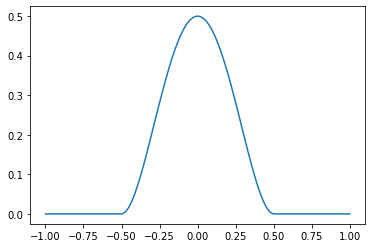

In [86]:
# Modeling the amplitude factor to supress oscillations in sinc 
# and ensure closest point works: avoid the global gradient descent

coeffs = symbols("a0:5")
z = symbols("z")

w = sum([ai * z**i for i,ai in enumerate(coeffs)])

A = symbols("A")

sol = solve([w.subs(z,-A), 
            diff(w,z).subs(z, -A), 
            w.subs(z,0) - A, 
            w.subs(z,A), 
            diff(w,z).subs(z,A)], coeffs)
w_sol = w.subs(sol)

print(w_sol)

from matplotlib import pyplot as plt
import numpy as np

A_val = 0.5
def w_plot(x, A_val):
    if (x < -A_val) or (x > A_val):
        return 0
    else:
        return w_sol.subs(A,A_val).subs(z,x)
x = np.linspace(-2*A_val,2*A_val,100)
y = [w_plot(xi, A_val) for xi in x]

plt.plot(x,y)